# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [1]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [2]:
DATASET_PATH = "/workspaces/ds-fall-2025-fri-0630/Week-07-Classification/data/college_student_placement_dataset.csv"
RANDOM_STATE = 45  # DO NOT CHANGE THIS RANDOM STATE.

## Preliminary Inspection

See what the raw file looks like!

In [3]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, "r") as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break  # Stop; there are less than 5 lines.

College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [4]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [5]:
# Identify which columns have null values.
print(df.isnull().sum())

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64


## Duplicate Rows Check
If so, remove the duplicates.

In [6]:
# Check to see if our data has any duplicate rows.
'''No duplicates. df.drop_duplicates() if we did have'''


'No duplicates. df.drop_duplicates() if we did have'

Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [7]:

print(" The non numeric columns arre Internship_Experience, Placement and College_ID (since it is an object)")
print()
print(df.dtypes)

 The non numeric columns arre Internship_Experience, Placement and College_ID (since it is an object)

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object


## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [8]:

df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Placed': 1, 'Not Placed': 0})

❔ When should you use this versus using `pd.get_dummies`?

You should use this when you have binary results, but pd.get_dummies is for one hot encoding when the column has more than two categories

# Visualization with `sns.pairplot`

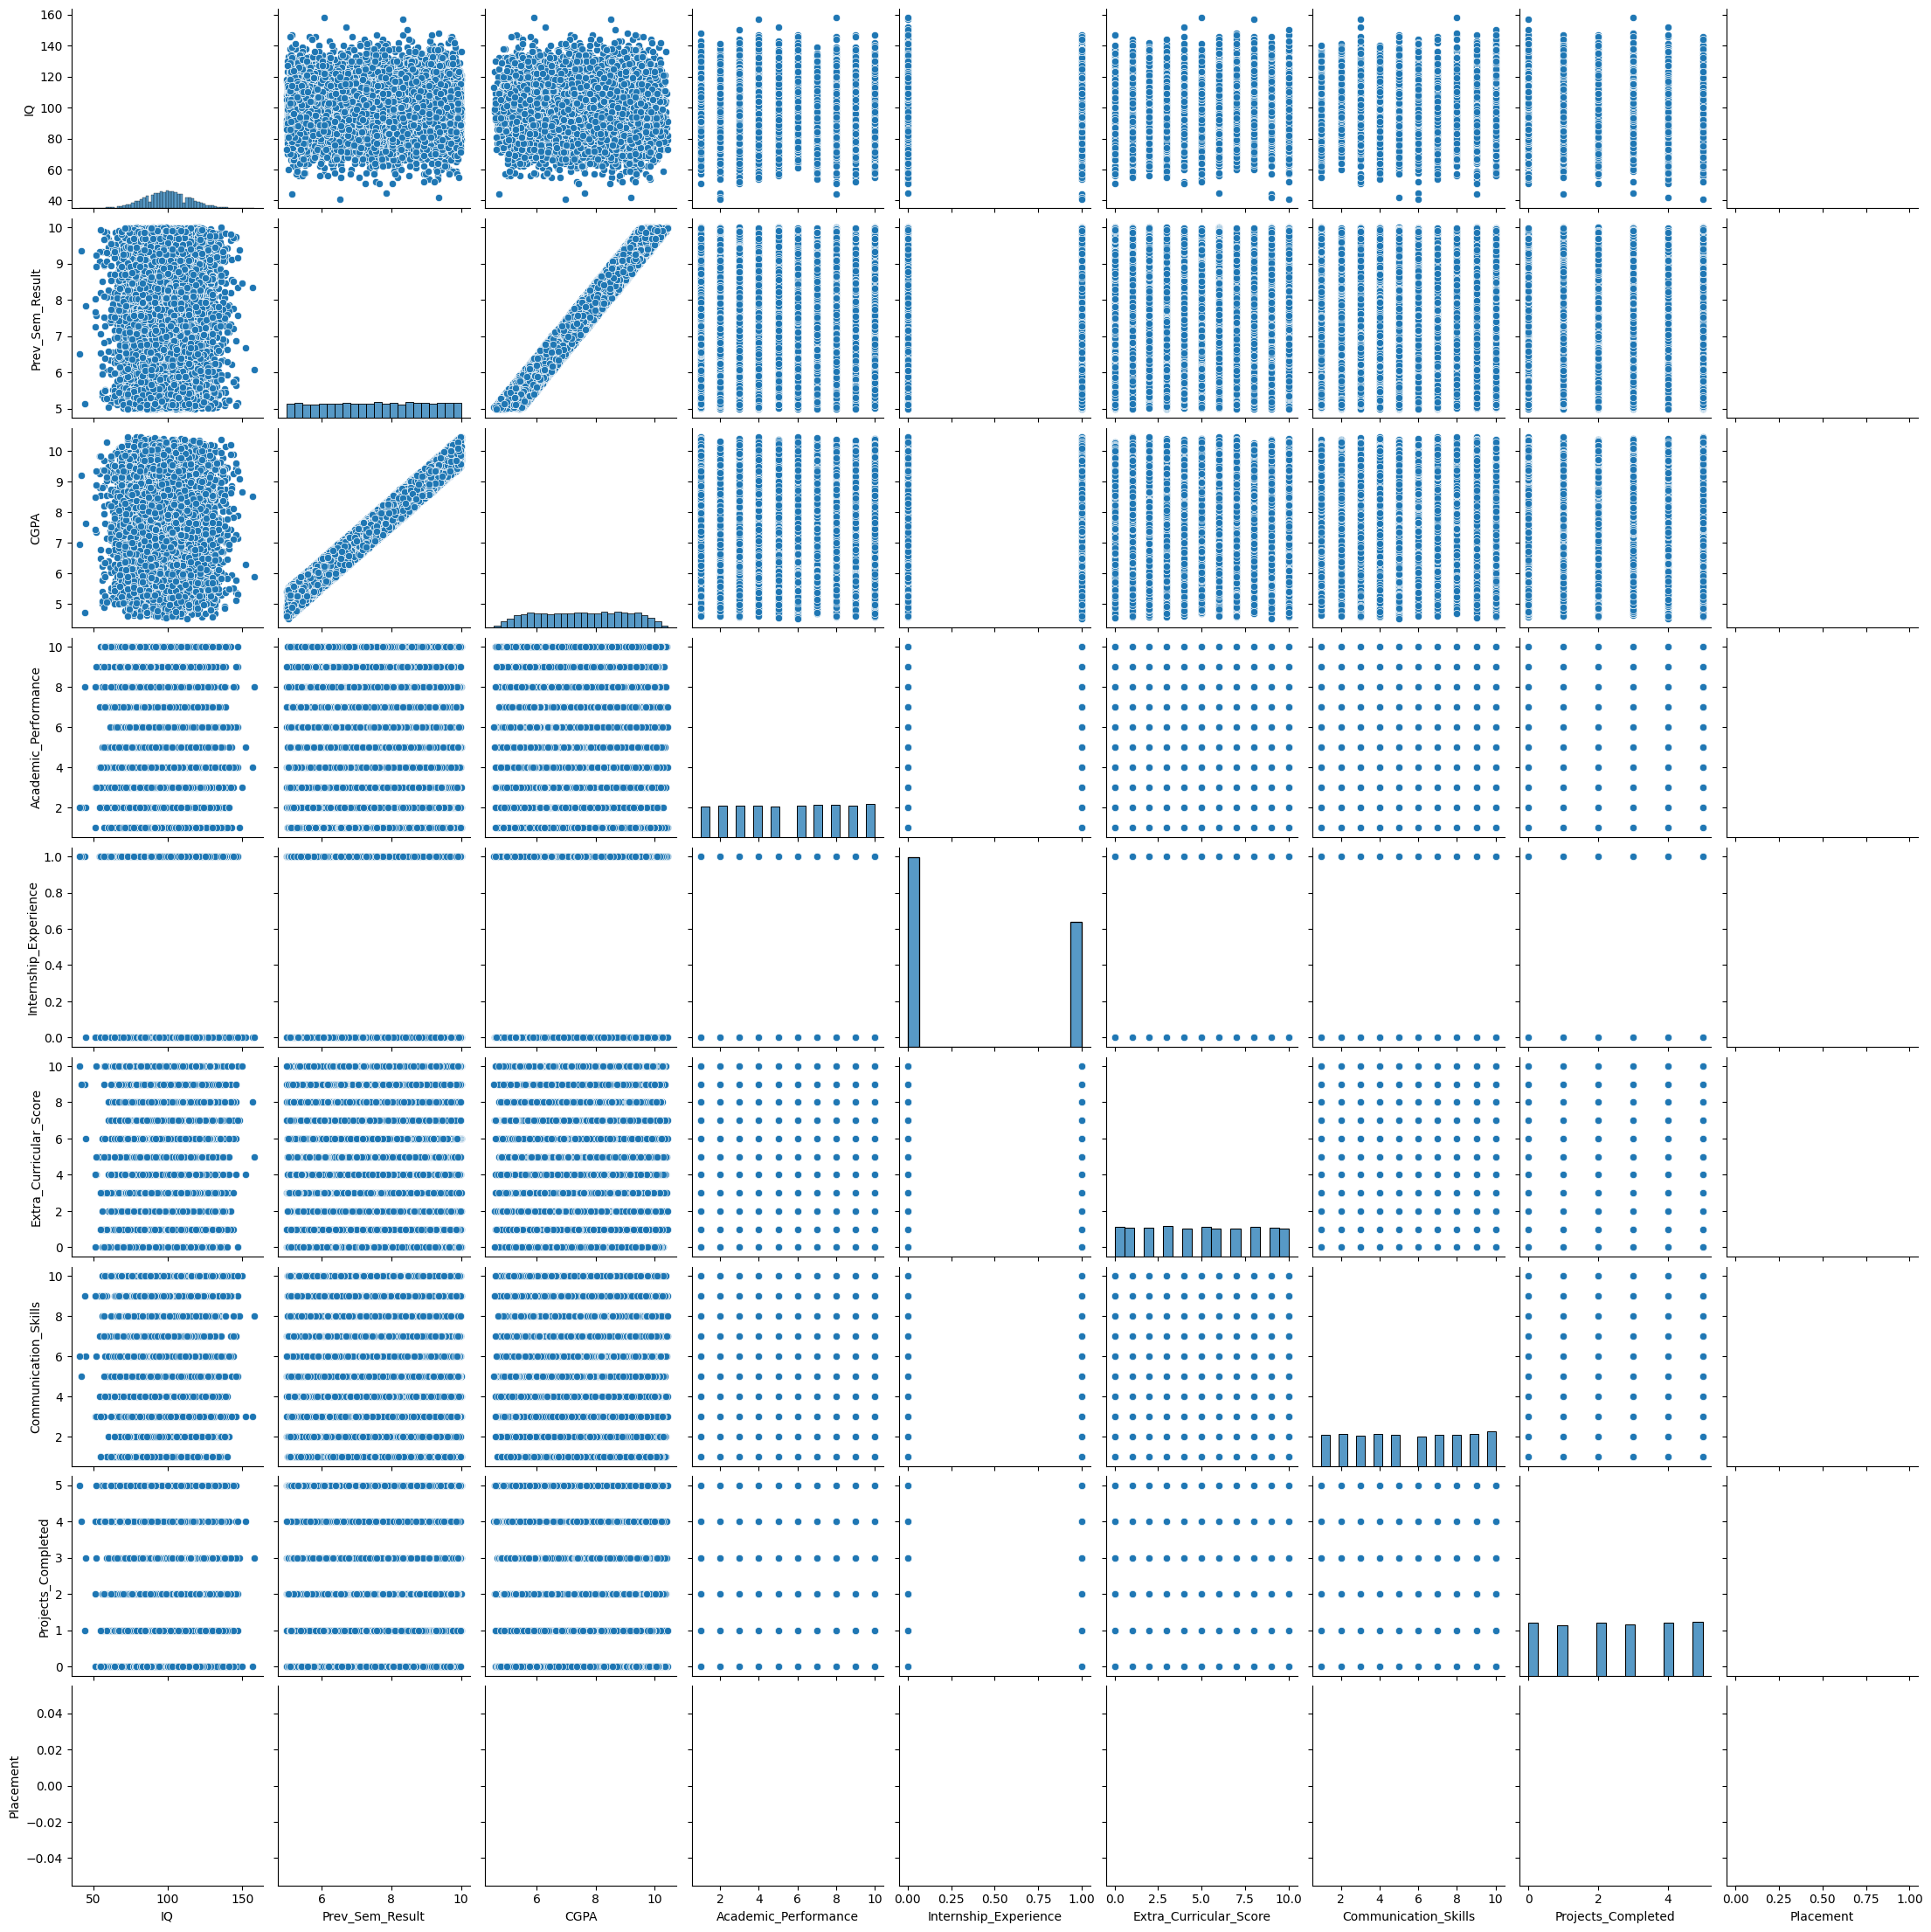

In [9]:
# Use sns.pariplot to visualize.
sns.pairplot(df, diag_kind='hist')
plt.show()


## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [10]:
# Set X to the desired features.
X = df[["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance",
        "Internship_Experience", "Extra_Curricular_Score",
        "Communication_Skills", "Projects_Completed"]]

# Set y to be our target variable.
y = df["Internship_Experience"]

## Split to Testing and Training Datasets 

In [11]:
# Split our data into testing and training pairs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)


# Print the length and width of our testing data.
print("X_train: %d rows, %d columns" % X_train.shape)
print("X_test: %d rows, %d columns" % X_test.shape)
print("y_train: %d rows, 1 column" % y_train.shape)
print("y_test: %d rows, 1 column" % y_test.shape)

X_train: 8000 rows, 8 columns
X_test: 2000 rows, 8 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


In [12]:
X_train_sm = sm.add_constant(X_train)

## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [13]:
# Initalize our logistic regressionmodel.
logit_model = sm.Logit(endog=y_train, exog=X_train_sm)
result = logit_model.fit()

         Current function value: 0.000000
         Iterations: 35


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [14]:
# 1. Make predictions of your test data and save them as `y_pred`.
# Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred = np.where(
    y_pred_prob > 0.5, 1, 0
)

y_pred

array([0, 0, 0, ..., 0, 1, 1], shape=(2000,))

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [15]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Plot a confusion matrix of your predicted results.

Text(0.5, 25.722222222222214, 'Model Prediction')

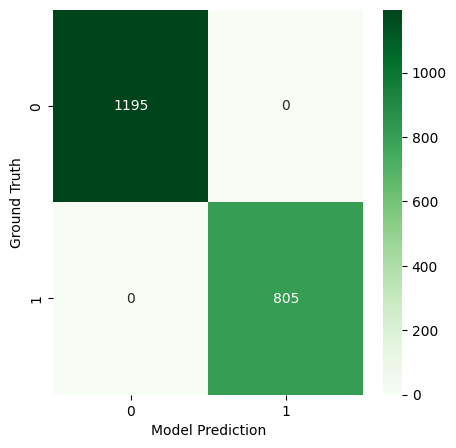

In [16]:
# 3. Plot a confusion matrix of your predicted results.
confusionmatrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5, 5))
ax = sns.heatmap(confusionmatrix, annot=True, cmap="Greens", fmt="g")
plt.ylabel("Ground Truth")
plt.xlabel("Model Prediction")

How many true positives and true negatives did your model get?

In [17]:
# How many true positives and true negatives did your model get?
confusionmatrix = confusion_matrix(y_test, y_pred)

print("True Negatives:", confusionmatrix[0,0])
print("False Positives:", confusionmatrix[0,1])
print("False Negatives:", confusionmatrix[1,0])
print("True Positives:", confusionmatrix[1,1])


True Negatives: 1195
False Positives: 0
False Negatives: 0
True Positives: 805


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [21]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, PerfectSeparationWarning

warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", PerfectSeparationWarning)

# Add a constant term to the independent variables.
X_train_sm = sm.add_constant(X_train)

# Fit the model.
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit(disp=False)

# Print the summary and interpret the results.
print(result.summary())

                             Logit Regression Results                            
Dep. Variable:     Internship_Experience   No. Observations:                 8000
Model:                             Logit   Df Residuals:                     7991
Method:                              MLE   Df Model:                            8
Date:                   Wed, 22 Oct 2025   Pseudo R-squ.:                   1.000
Time:                           22:38:21   Log-Likelihood:            -0.00050317
converged:                         False   LL-Null:                       -5367.0
Covariance Type:               nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -21.8775    907.041     -0.024      0.981   -1799.645    1755.890
IQ                        -0.0009      2.997     -0.000      1.000     

# Extra Credit: Use your brain and make a better model (as in better scores).



In [19]:
# Define the new X variable, and reuse the same y variable from before.


# Split our data into testing and training. Remember to use the same random state as you used before


# Initalize our model.


# Fit-train our model using our training data.


# Make new predicitions using our testing data.


# Print each of our scores to inspect performance.


# Plot the confusion matrix.